# Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("articles_2017-11-01_2017-11-30.csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
4b92d2afc3eb0becb58ee0f8a866e8bb3e0c6c3c,https://www.nytimes.com/2017/11/01/travel/new-...,How I Rolled on the Crescent: New York to New ...,2017-11-01 10:39:10.125,2017-11-01,198,0.590325,2017-11-01T23:02:04.537Z,40,103,55,New York Times,nytimes_com,0,2613,118.0,False,NaN,NaN,120,NaN
eedd25b64e2cf37cf2198783311a1a823e26965a,https://www.nytimes.com/2017/11/01/world/austr...,"Australia Bans Climbing on Uluru, a Popular Si...",2017-11-01 10:54:17.225,2017-11-01,592,1.197048,2017-11-01T13:07:04.833Z,98,302,192,New York Times,nytimes_com,0,6475,120.0,True,14837915.0,2017-11-03T06:25:01.000Z,120,NaN
68cf97046a5705f8c6826ab1fc3ce6e98e845a0d,https://www.thetimes.co.uk/article/in-pictures...,In pictures: terror in New York,2017-11-01 09:59:07.929,2017-11-01,2,0.016398,2017-11-01T17:17:03.982Z,0,1,1,The Times,thetimes_co_uk,0,840,275.0,False,NaN,NaN,6435,NaN
ff04a763b2f01746c4b4718bf2ad150468918bb0,https://www.nytimes.com/2017/11/01/upshot/why-...,Why Advertising Is a Poor Choice to Tackle the...,2017-11-01 10:03:09.094,2017-11-01,537,1.986755,2017-11-01T10:14:11.018Z,112,291,134,New York Times,nytimes_com,0,5825,119.0,True,14830035.0,2017-11-01T10:00:34.000Z,120,NaN
1bf0cb152322d6d4ec6f0910f7bbaac27976fe6e,https://www.nytimes.com/2017/11/01/podcasts/th...,"Listen to ‘The Daily’: Mueller’s Strategy, and...",2017-11-01 11:14:11.268,2017-11-01,164,1.393823,2017-11-01T12:26:12.465Z,30,110,24,New York Times,nytimes_com,0,1375,121.0,True,14830043.0,2017-11-01T11:23:06.000Z,120,NaN


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [3]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   155376.00
mean      1117.87
std       8083.39
min          0.00
50%         24.00
75%        233.00
90%       1454.00
95%       4059.25
99%      21166.75
99.5%    33982.38
99.9%    93932.13
max     814679.00
Name: fb_engagements, dtype: float64

There's no articles with more than 1 million engagements this month.

In [4]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,


In [5]:
data.fb_engagements.mode()

0    0
dtype: int64

Going back to the enagement counts, we see the mean is 1,117, mode is zero, median is 24, 90th percentile is 1,453, 99th percentile is 21,166, 99.5th percentile is 33,982. The standard deviation is 8,083, significantly higher than the mean, so this is not a normal distribution. 

Key publishers stats

In [6]:
data.groupby("publisher_id").agg({'url': 'count', 'fb_engagements': ['sum', 'median', 'mean']})

url fb_engagements                
                                  count            sum  median    mean
publisher_id                                                          
anotherangryvoice_blogspot_co_uk     46         115733 1570.00 2515.93
bbc_co_uk                         12497        9327679   32.00  746.39
breitbart_com                      2702       11917358  224.50 4410.57
brexitcentral_com                    52          30476  181.50  586.08
buzzfeed_com                       1609        4482917  159.00 2786.15
cnn_com                            3425       17299480  550.00 5050.94
dailymail_co_uk                   23842       17151377   28.00  719.38
economist_com                       581         190826   30.00  328.44
evolvepolitics_com                   61         153821 1413.00 2521.66
foxnews_com                        5323       15572831   74.00 2925.57
ft_com                             4997         344064    4.00   68.85
huffingtonpost_com                 9772       13145495   11.00 1345.22
independent_co_uk                  6567        8859577   36.00 1349.11
indy100_com                         545         765012  107.00 1403.69
lemonde_fr                         3991        2567387   76.00  643.29
libdemvoice_org                     170           2676    7.00   15.74
mirror_co_uk                      10121        6778308   46.00  669.73
nbcnews_com                        2003        6196290  478.00 3093.50
newstatesman_com                    526          83158   22.00  158.10
npr_org                            2102        6461653  160.00 3074.05
nytimes_com                        4830       18352173  214.00 3799.62
order-order_com                     267          95238  143.00  356.70
propublica_org                       57          68028  365.00 1193.47
reuters_com                        5952        1866563   23.00  313.60
rt_com                             2691        2228324  207.00  828.07
skwawkbox_org                       117          57044  284.00  487.56
telegraph_co_uk                    7571        2685206   16.00  354.67
thecanary_co                        251         363674  849.00 1448.90
theguardian_com                    8493       10074837  137.00 1186.25
thetimes_co_uk                     9195         292184    1.00   31.78
washingtonpost_com                24278       14213560    0.00  585.45
westmonster_com                     350         429874   40.00 1228.21
yournewswire_com                    392        1517525  232.00 3871.24

In [7]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

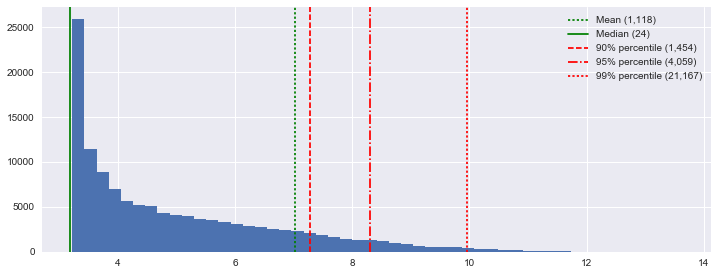

In [8]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


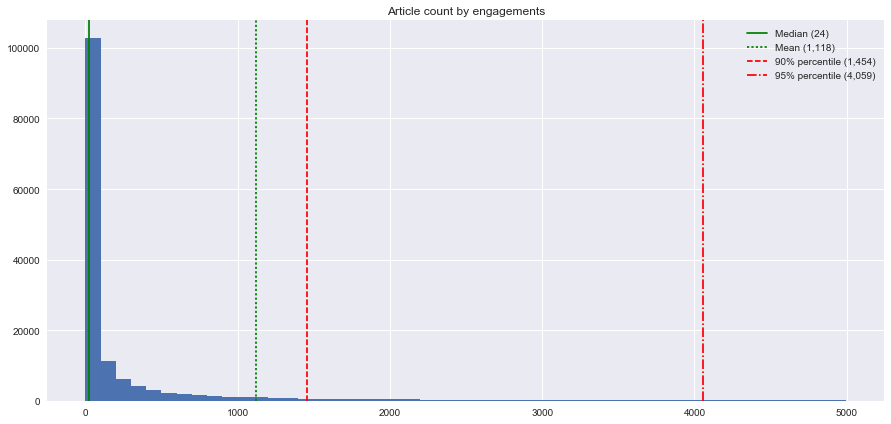

In [9]:
eng = data.fb_engagements[(data.fb_engagements < 5000)]
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(15,7))
plt.hist(eng, bins=50)
plt.title("Article count by engagements")
plt.axvline(median, label=f'Median ({median:,.0f})', color='green')
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(ninety, linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(ninetyfive, linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
# plt.axvline(ninetynine, linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


In [10]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   124947.00
mean         4.98
std          1.76
min          3.22
25%          3.50
50%          4.39
75%          6.03
max         11.45
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [11]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   124947.00
mean        11.17
std         10.74
min          0.00
25%          2.00
50%          8.00
75%         18.00
max         50.00
Name: fb_engagements, dtype: float64

In [12]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

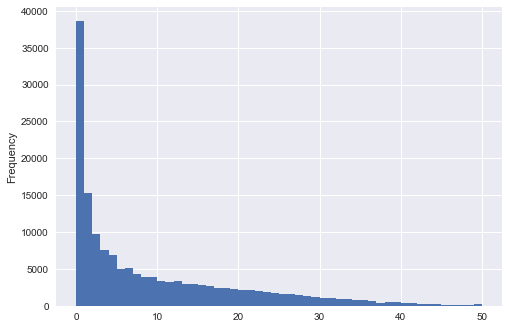

In [13]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Looks good to me, lets save that.

In [14]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [15]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   155376.00
mean         9.19
std        103.71
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        269.00
99.5%      574.00
99.9%     1219.00
max      22314.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [16]:
lead_articles = data[data.mins_as_lead > 0]

In [17]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    4321.00
mean      330.52
std       529.72
min         4.00
25%        80.00
50%       174.00
75%       412.00
90%       869.00
95%      1105.00
99%      1609.80
99.5%    1938.40
99.9%    4460.68
max     22314.00
Name: mins_as_lead, dtype: float64

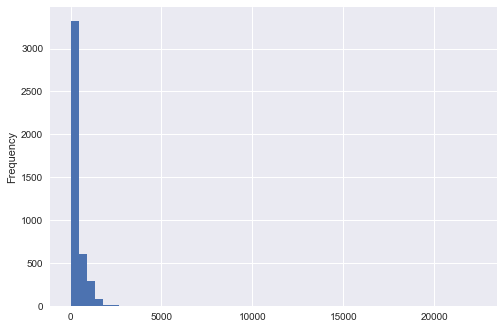

In [18]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

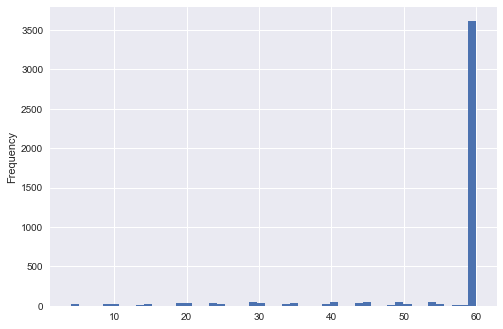

In [19]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [20]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
lemonde_fr                             618
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     1276

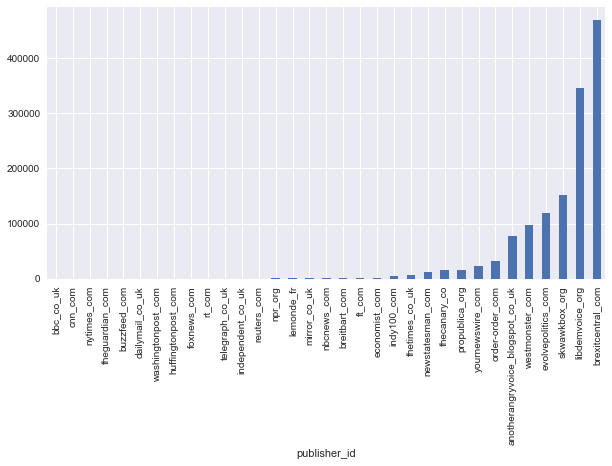

In [21]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

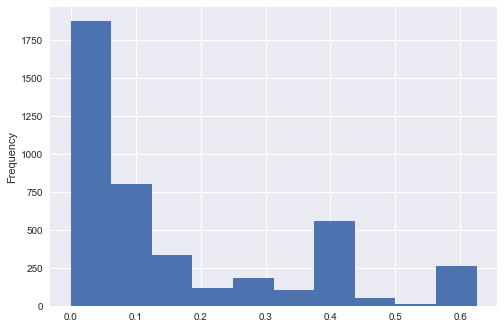

In [22]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

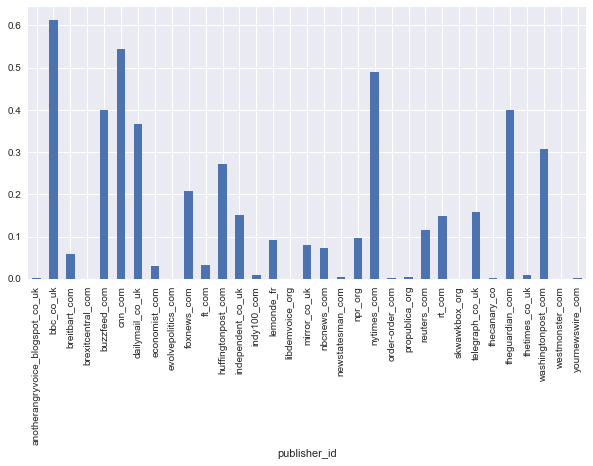

In [23]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

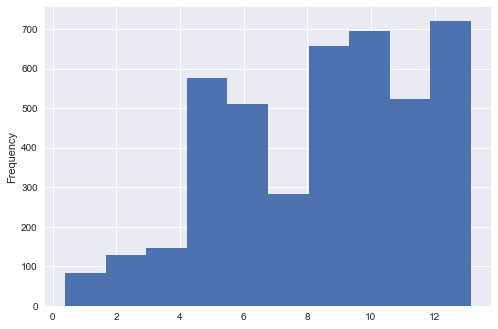

In [24]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [25]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,46.00,5.26,0.47,2.13,5.33,5.33,5.33,5.33
bbc_co_uk,95.00,12.89,1.14,5.26,13.15,13.15,13.15,13.15
breitbart_com,183.00,8.43,0.94,3.48,8.69,8.69,8.69,8.69
brexitcentral_com,39.00,4.49,0.63,0.69,4.59,4.59,4.59,4.59
buzzfeed_com,302.00,11.75,1.16,3.01,12.02,12.02,12.02,12.02
cnn_com,201.00,12.27,1.97,2.15,12.89,12.89,12.89,12.89
dailymail_co_uk,165.00,11.45,1.58,2.77,11.85,11.85,11.85,11.85
economist_com,65.00,7.65,1.56,0.53,7.99,7.99,7.99,7.99
evolvepolitics_com,24.00,5.13,0.00,5.13,5.13,5.13,5.13,5.13


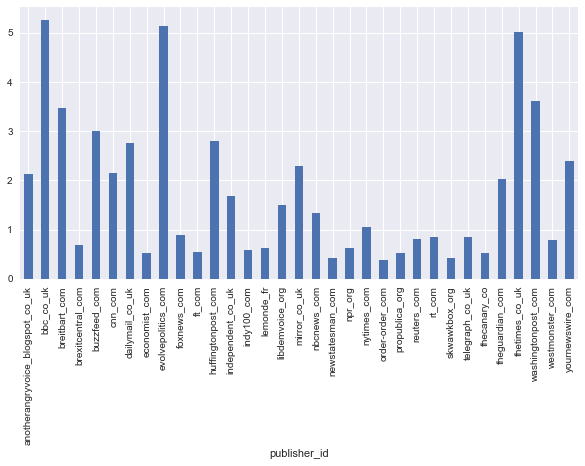

In [26]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [27]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [28]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.38500569152790032, 13.145359968846892)

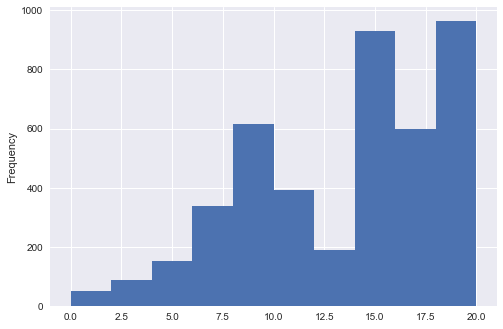

In [29]:
lead_proposal_3.plot.hist()

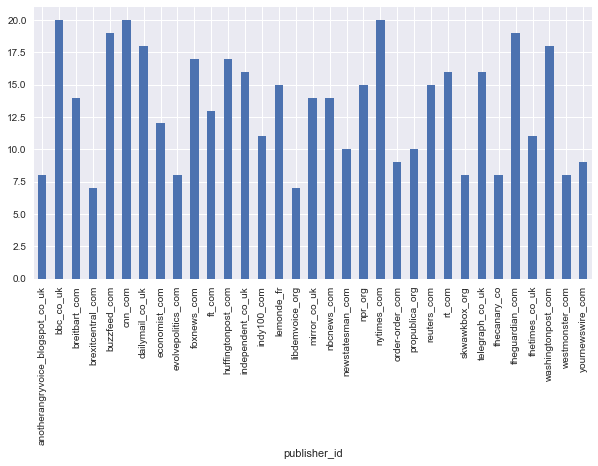

In [30]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [31]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [32]:
data.lead_score.value_counts().sort_index()

0.00     151057
1.00         47
2.00         34
3.00         54
4.00         75
5.00         78
6.00         67
7.00        272
8.00        303
9.00        312
10.00       199
11.00       193
12.00        89
13.00       101
14.00       556
15.00       375
16.00       320
17.00       280
18.00       244
19.00       403
20.00       317
Name: lead_score, dtype: int64

In [33]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      14.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  8.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
lemonde_fr                         15.00
libdemvoice_org                     7.00
mirror_co_uk                       14.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [34]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [35]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

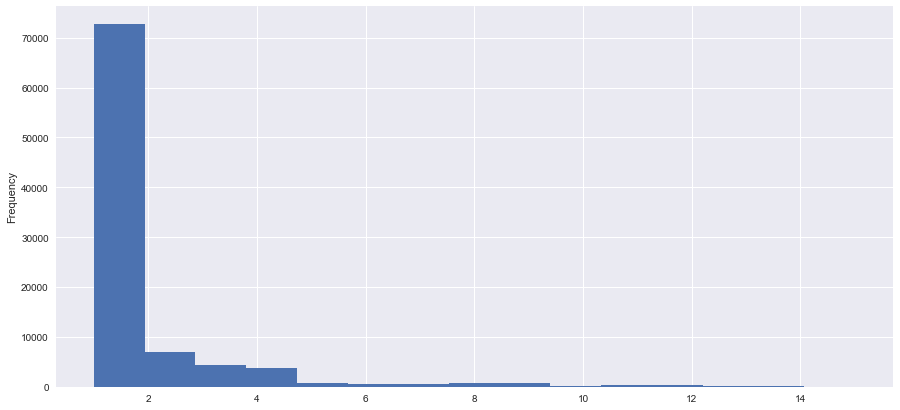

In [36]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [37]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     72664
2.00      6937
3.00      4459
4.00      3846
5.00       845
6.00       539
7.00       513
8.00       706
9.00       678
10.00      222
11.00      339
12.00      298
13.00      145
14.00       96
15.00       47
dtype: int64

In [38]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk      46.00
bbc_co_uk                          15119.00
breitbart_com                       2606.00
brexitcentral_com                     52.00
buzzfeed_com                        9698.00
cnn_com                            11792.00
dailymail_co_uk                    13965.00
economist_com                        319.00
evolvepolitics_com                    60.00
foxnews_com                         6473.00
ft_com                              3167.00
huffingtonpost_com                  7534.00
independent_co_uk                   4431.00
indy100_com                          534.00
lemonde_fr                          3972.00
libdemvoice_org                      170.00
mirror_co_uk                        9502.00
nbcnews_com                         1937.00
newstatesman_com                     515.00
npr_org                             2449.00
nytimes_com                         9488.00
order-order_com                      267.00
propublica_org     

That looks good to me.

In [39]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [40]:
data.front_score 

id
4b92d2afc3eb0becb58ee0f8a866e8bb3e0c6c3c   4.00
eedd25b64e2cf37cf2198783311a1a823e26965a   4.00
68cf97046a5705f8c6826ab1fc3ce6e98e845a0d   1.00
ff04a763b2f01746c4b4718bf2ad150468918bb0   4.00
1bf0cb152322d6d4ec6f0910f7bbaac27976fe6e   4.00
60192d56f7ff0332b325c51b3a9c5ac59d42c525   1.00
40a59853e4642a4ababa6938176089b8775c4016   1.00
d1e05106c3ec699a37bf8f26ab63e4dbebcd4971   4.00
ed61f808ac7756c2d73dfdf6855c34786bc9de02   2.00
bbadee9289eea2f0b6b6220f9f613578c37ef621   1.00
063a022e6f66ec2763b22a815ec25471e22287e3   1.00
478f397e1c731872fba60a4189bc72c924cfc847   1.00
17f0678815a01ee8e4914e30d612c294c78c68b8   1.00
1b7a6a9b1aea0996b27cf0f5460fa23bdd179067   1.00
348163ba67b3cd7e989236ce8a739b74f81cd67e   1.00
99f97d2f01a3c2dc40da166b18abacdbc85b9634   1.00
587272809793b00754536e86b8f535cc5fbc9700   1.00
57326012898026faf47a6e5969e4e3a6ebe9005d   1.00
13ac494c2c23dfe4395decfd9882e4851a1cd679   1.00
e3a02a337c53a78300d7e3c238a7ba2084705106   1.00
d00575f8a0fddb2cf4481ad4844aea24f481d

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [41]:
data.fb_brand_page_likes.max()

45013800.0

In [42]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

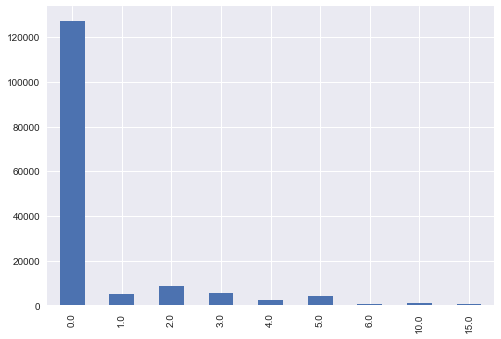

In [43]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [44]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,46.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
bbc_co_uk,12497.00,0.58,2.89,0.00,0.00,0.00,0.00,15.00
breitbart_com,2702.00,0.84,0.99,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,52.00,0.98,0.14,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,1609.00,0.30,0.46,0.00,0.00,0.00,1.00,1.00
cnn_com,3425.00,2.79,4.49,0.00,0.00,0.00,10.00,10.00
dailymail_co_uk,23842.00,0.56,1.58,0.00,0.00,0.00,0.00,5.00
economist_com,581.00,2.32,1.26,0.00,3.00,3.00,3.00,3.00
evolvepolitics_com,61.00,0.90,0.30,0.00,1.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [45]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     330305.00
bbc_co_uk                          45013800.00
breitbart_com                       3748243.00
brexitcentral_com                     12499.00
buzzfeed_com                        2795165.00
cnn_com                            29252657.00
dailymail_co_uk                    13536602.00
economist_com                       8387474.00
evolvepolitics_com                   114880.00
foxnews_com                        16052065.00
ft_com                              3709965.00
huffingtonpost_com                  9815158.00
independent_co_uk                   7842115.00
indy100_com                          231700.00
lemonde_fr                          3949946.00
libdemvoice_org                        8615.00
mirror_co_uk                        2926052.00
nbcnews_com                         9381825.00
newstatesman_com                     154735.00
npr_org                             6252770.00
nytimes_com                        14989576.00


In [46]:
np.log(2149)

7.6727578966425103

In [47]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.71
bbc_co_uk                          17.62
breitbart_com                      15.14
brexitcentral_com                   9.43
buzzfeed_com                       14.84
cnn_com                            17.19
dailymail_co_uk                    16.42
economist_com                      15.94
evolvepolitics_com                 11.65
foxnews_com                        16.59
ft_com                             15.13
huffingtonpost_com                 16.10
independent_co_uk                  15.88
indy100_com                        12.35
lemonde_fr                         15.19
libdemvoice_org                     9.06
mirror_co_uk                       14.89
nbcnews_com                        16.05
newstatesman_com                   11.95
npr_org                            15.65
nytimes_com                        16.52
order-order_com                    10.72
propublica_org                     12.83
reuters_com                        15.18
rt_

That's more like it, but the lower numbers should be smaller.

In [48]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.80
bbc_co_uk                          10.71
breitbart_com                       8.23
brexitcentral_com                   2.53
buzzfeed_com                        7.94
cnn_com                            10.28
dailymail_co_uk                     9.51
economist_com                       9.03
evolvepolitics_com                  4.74
foxnews_com                         9.68
ft_com                              8.22
huffingtonpost_com                  9.19
independent_co_uk                   8.97
indy100_com                         5.45
lemonde_fr                          8.28
libdemvoice_org                     2.15
mirror_co_uk                        7.98
nbcnews_com                         9.15
newstatesman_com                    5.04
npr_org                             8.74
nytimes_com                         9.62
order-order_com                     3.81
propublica_org                      5.92
reuters_com                         8.27
rt_

In [49]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [50]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
lemonde_fr                         12.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [51]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [52]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   3.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
lemonde_fr                         12.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    7.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     5.00
propublica_org                      8.00
reuters_com                        12.00
rt_

In [53]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [54]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

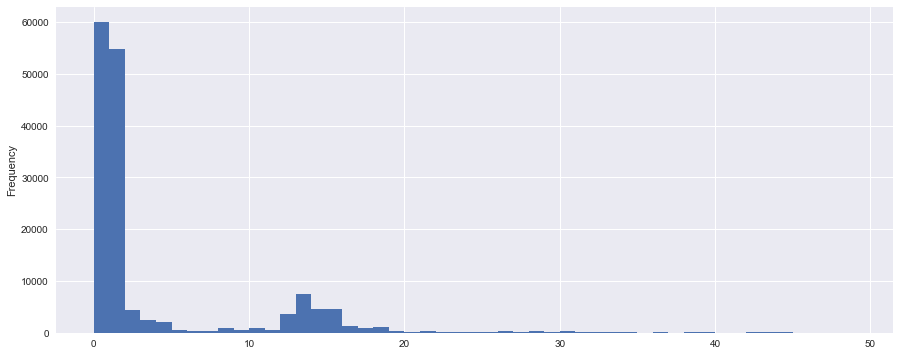

In [55]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

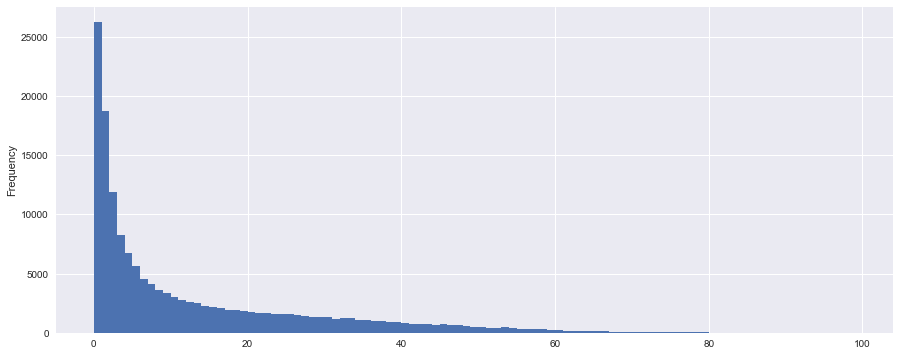

In [56]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [57]:
data.attention_index.value_counts().sort_index()

0.00     26228
1.00     18738
2.00     11875
3.00      8299
4.00      6777
5.00      5670
6.00      4580
7.00      4152
8.00      3592
9.00      3395
10.00     3052
11.00     2790
12.00     2610
13.00     2552
14.00     2289
15.00     2188
16.00     2124
17.00     1923
18.00     1939
19.00     1810
20.00     1731
21.00     1709
22.00     1636
23.00     1592
24.00     1610
25.00     1574
26.00     1515
27.00     1385
28.00     1367
29.00     1322
         ...  
65.00      127
66.00      111
67.00       84
68.00       93
69.00       88
70.00       54
71.00       61
72.00       41
73.00       54
74.00       43
75.00       33
76.00       41
77.00       40
78.00       30
79.00       36
80.00       24
81.00       20
82.00       23
83.00       20
84.00       22
85.00       17
86.00       10
87.00       10
88.00       16
89.00        9
90.00        7
91.00        6
92.00        6
93.00        5
94.00        2
Name: attention_index, Length: 95, dtype: int64

In [58]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
73ea9633c21733c5931c0c9c18b066285cb1bf39,http://www.cnn.com/2017/11/27/europe/prince-ha...,Prince Harry and Meghan Markle are engaged,2017-11-27 10:10:13.896,2017-11-27 10:06:10.000,120080,374.58,2017-11-27T10:21:10.556Z,17091,95550,7439,...,29210147.00,2017-11-27T10:10:57.000Z,105,30.00,50.00,20.00,9.00,15.00,44.00,94.00
0844561b92420804aad85219a5552042ce4d265c,http://money.cnn.com/2017/11/29/media/matt-lau...,Matt Lauer fired from NBC News,2017-11-29 12:13:21.006,2017-11-29 12:03:48.000,280472,1059.42,2017-11-29T12:25:04.420Z,121197,131299,27976,...,29221482.00,2017-11-29T12:10:25.000Z,105,nan,50.00,20.00,9.00,15.00,44.00,94.00
d89e12f04f8c41a417503f4ddd8738eb9e3a4fbe,http://www.cnn.com/2017/11/03/politics/bowe-be...,Bowe Bergdahl case: Judge reaches decision on ...,2017-11-03 15:13:06.928,2017-11-03 15:09:11.000,116359,254.01,2017-11-03T17:16:12.979Z,57923,48747,9689,...,29117755.00,2017-11-03T15:50:13.000Z,105,710.00,50.00,20.00,8.00,15.00,43.00,93.00
e517b876ffba73e2f5ffd10ba0f8f429906d29f5,https://www.buzzfeed.com/briannasacks/trump-is...,Trump Is Allowing Hunters To Import Elephant T...,2017-11-16 03:58:19.582,2017-11-16 03:38:35.000,123141,109.65,2017-11-16T14:11:09.991Z,30123,80287,12731,...,2764495.00,2017-11-19T16:02:00.000Z,147,741.00,50.00,19.00,13.00,11.00,43.00,93.00
fc4d4c9056d6150a5d077277d6cbbad6d94cd9eb,http://www.bbc.co.uk/news/world-africa-42071488,Zimbabwe's President Mugabe 'resigns',2017-11-21 15:55:05.471,2017-11-21 15:51:28.000,83318,945.12,2017-11-21T16:06:25.141Z,11043,61549,10726,...,44879347.00,2017-11-21T15:54:48.000Z,96,59.00,50.00,20.00,8.00,15.00,43.00,93.00
eb5cf786e76b63b71b65ee2d768bc6b852cd09f5,http://www.cnn.com/2017/11/26/politics/tom-ste...,Tom Steyer defends $20M ad campaign calling to...,2017-11-26 20:52:30.134,2017-11-26 20:51:09.000,72391,345.35,2017-11-26T23:19:13.135Z,12739,56089,3563,...,29208375.00,2017-11-26T23:00:07.000Z,105,583.00,49.00,20.00,9.00,15.00,44.00,93.00
f4068619cf024977dd22e0f55df457e8a5e1e81a,http://www.cnn.com/2017/11/11/politics/preside...,Trump says he believes Putin's election meddli...,2017-11-11 11:13:12.620,2017-11-11 11:07:35.000,119370,217.41,2017-11-11T16:54:07.932Z,42730,63073,13567,...,29149649.00,2017-11-11T11:55:15.000Z,105,269.00,50.00,20.00,8.00,15.00,43.00,93.00
ae93aeb0b54e4226e91f871104402b5d593c017a,http://www.cnn.com/2017/11/04/politics/the-las...,George H.W. Bush labels Trump a 'blowhard' in ...,2017-11-04 04:04:21.998,2017-11-04 04:01:21.000,64884,201.01,2017-11-04T13:15:03.379Z,10290,47483,7111,...,29121177.00,2017-11-04T12:46:27.000Z,105,1268.00,48.00,20.00,9.00,15.00,44.00,92.00
bac634126d3948d4a630e9ed45fc43daf5e47512,http://www.bbc.co.uk/news/world-middle-east-42...,Bomb attack on mosque in Egypt's Sinai,2017-11-24 11:40:13.945,2017-11-24 11:36:06.000,73270,111.27,2017-11-24T15:22:11.248Z,9639,53547,10084,...,44919422.00,2017-11-24T15:12:31.000Z,96,64.00,49.00,20.00,8.00,15.00,43.00,92.00


In [59]:
data["score_diff"] = data.promotion_score - data.response_score

In [60]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
8fecd816fc621ac4816c2a7aae0d71d3b97e2489,https://www.buzzfeed.com/keelyflaherty/meet-th...,Meet the Breakout Star of “Lady Bird”,2017-11-22 17:49:17.714,2017-11-20 18:36:28.000,1,0.09,2017-11-22T18:01:13.856Z,0,0,1,...,2017-11-24T05:32:00.000Z,147,1258.00,0.00,19.00,15.00,11.00,45.00,45.00,45.00
c4c68e90d29b9da58609f78ce13692d2bae1ab88,https://www.buzzfeed.com/borzoudaragahi/afghan...,Afghanistan’s Hipsters Have Found Themselves A...,2017-11-18 14:04:23.015,2017-11-17 13:47:19.000,0,0.00,2017-11-18T14:16:04.593Z,0,0,0,...,2017-11-26T19:05:00.000Z,147,996.00,0.00,19.00,14.00,11.00,44.00,44.00,44.00
fcf67d8979ac5c70155e54a80b87b875f6768244,https://www.buzzfeed.com/danvergano/beam-me-up...,A Russian Billionaire Just Founded The First “...,2017-11-25 14:04:25.111,2017-11-22 16:45:35.000,1,0.10,2017-11-25T14:15:15.289Z,0,0,1,...,2017-11-26T00:33:01.000Z,147,820.00,0.00,19.00,14.00,11.00,44.00,44.00,44.00
b38c9b0fc469585120c9f6b904463e406916a695,https://www.buzzfeed.com/adolfoflores/these-ce...,These Central American Children Wonder Why Tru...,2017-11-16 16:55:17.963,2017-11-14 21:02:32.000,0,0.00,2017-11-16T17:06:10.897Z,0,0,0,...,2017-11-18T04:45:00.000Z,147,2728.00,0.00,19.00,14.00,11.00,44.00,44.00,44.00
b3466fdbf642535131f7ef5beaaf63a868a607f6,https://www.buzzfeed.com/mollyhensleyclancy/wh...,Why Betsy DeVos May Be The Beauty School Indus...,2017-12-01 14:01:26.916,2017-11-29 19:52:29.000,0,0.00,2017-12-01T14:12:11.651Z,0,0,0,...,2017-12-02T00:44:01.000Z,147,5706.00,0.00,19.00,13.00,11.00,43.00,43.00,43.00
7aaf046bf5bbc5ef14e91b7be017c6b1989439c3,https://www.buzzfeed.com/sylviaobell/nola-darling,Here’s Why You’ll Love And Hate Nola Darling I...,2017-11-24 16:19:21.409,2017-11-22 22:57:31.000,3,0.10,2017-11-24T16:30:18.887Z,0,0,3,...,2017-11-28T05:10:00.000Z,147,2489.00,1.00,19.00,14.00,11.00,44.00,45.00,43.00
ffd6202df243fe5f684c605e023e977a07fafc50,https://www.buzzfeed.com/doree/meet-the-people...,Meet the People Who Listen to Podcasts at Supe...,2017-11-12 17:25:14.647,2017-11-09 15:06:16.000,0,0.00,2017-11-12T17:36:07.410Z,0,0,0,...,2017-11-13T07:04:00.000Z,147,1958.00,0.00,19.00,12.00,11.00,42.00,42.00,42.00
1e74e5aa86a20450f01357ff3222b67c6c248e58,https://www.buzzfeed.com/tomphillips/we-found-...,We Found 45 Suspected Bot Accounts Sharing Pro...,2017-11-24 09:46:18.952,2017-11-22 11:18:59.000,10,0.92,2017-11-24T09:58:03.524Z,0,5,5,...,2017-11-24T09:48:09.000Z,147,1781.00,2.00,19.00,14.00,11.00,44.00,46.00,42.00
c4b00967f43439a68074164f3e522875295d49e8,https://www.buzzfeed.com/charliewarzel/youtube...,YouTube Is Disabling Predatory Comments — But ...,2017-12-01 01:58:17.657,2017-11-29 22:41:29.000,2,0.20,2017-12-01T02:09:08.636Z,0,0,2,...,2017-12-01T03:24:00.000Z,147,686.00,1.00,19.00,12.00,11.00,42.00,43.00,41.00


In [61]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
42028ce3b987d9ec95e01274b992204bf27fdb1a,https://www.huffingtonpost.com/entry/exposing-...,Exposing America's Biggest Hypocrites: Evangel...,2017-11-24 17:31:31.338,2017-11-24 17:27:39.012,86827,79.97,2017-11-25T17:20:19.095Z,18763,56521,11543,...,NaN,215,953.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
0d1704ce4fcd2856a1357d444ab6ddd4610db8f8,https://www.huffingtonpost.com/entry/since-you...,"Since you asked, Roy Moore, here is why victim...",2017-11-11 18:01:19.973,2017-11-11 17:49:19.798,85116,21.63,2017-11-16T01:28:12.610Z,11355,56808,16953,...,NaN,215,1261.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
93f4b0a5428fd4f228b02b823c4f3922e6130bff,https://www.nytimes.com/2017/11/26/business/me...,Time Inc. Is Said to Near Sale in Deal Backed ...,2017-11-26 21:07:10.424,2017-11-26 21:05:08.000,94430,328.39,2017-11-27T03:06:04.999Z,20502,59091,14837,...,NaN,120,680.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
36a95aa544343e37d69586a3f628b6ebe4e04220,https://www.buzzfeed.com/alexandrearagao/manif...,Manifestantes põem fogo em boneca de filósofa ...,2017-11-07 14:46:25.813,2017-11-07 14:35:57.000,80375,206.32,2017-11-07T16:10:08.489Z,11476,63186,5713,...,NaN,147,nan,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
71e02bf08d789e6191eac1f32dfefd85c6f71a27,http://insider.foxnews.com/2017/11/07/mike-pen...,WATCH: Pence Responds to Attacks on Prayer Aft...,2017-11-08 04:59:07.133,2017-11-07 23:50:00.000,109556,229.75,2017-11-08T12:27:07.534Z,14945,89516,5095,...,NaN,285,197.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
21e7fb448ff66db53054103e7e866ebd8faafdb6,http://www.foxnews.com/politics/2017/11/03/tru...,Trump embarks on 13-day foreign trip to Asia,2017-11-03 15:34:17.642,2017-11-03 15:21:29.000,80522,162.73,2017-11-03T22:02:04.064Z,9910,68673,1939,...,NaN,285,1053.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
c08460b2595b412be2e6a31d0c42234a67ba7d21,http://www.foxnews.com/entertainment/2017/11/3...,Jim Nabors dead; star best known as Gomer Pyle...,2017-11-30 18:09:13.397,2017-11-30 18:03:53.000,102762,303.00,2017-11-30T20:17:10.889Z,16818,70041,15903,...,NaN,285,172.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
9b07e5f6fc081861f8d0c6d6bb478e6c43d3fba6,http://yournewswire.com/jay-z-jesus-fake-lucifer/,Jay-Z: 'Jesus Is Fake News; Lucifer Is Way Of ...,2017-11-13 17:54:26.080,2017-11-13 17:27:17.000,85940,32.63,2017-11-14T16:17:12.675Z,42233,33501,10206,...,NaN,22568,521.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
26f86dbc9b9cc02d1e3130f085f97195b585a3a4,https://www.washingtonpost.com/news/sports/wp/...,Shalane Flanagan becomes first American woman ...,2017-11-05 16:59:18.064,2017-11-05 16:56:00.000,114335,1522.95,2017-11-06T16:28:13.194Z,3220,106152,4963,...,NaN,191,32.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [62]:
data.to_csv("articles_with_provisional_scores_2017-10-01_2017-10-31.csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 